In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model, Sequential


In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

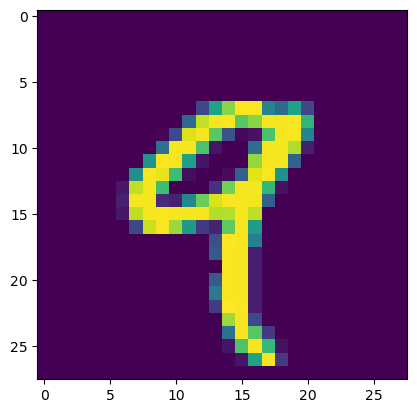

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4])

In [23]:
hdc_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    # Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
hdc_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Trainable Parameter Calculation

Trainable parameters in a dense layer are calculated as:  

$$\text{Trainable Parameters} = \text{Weights} + \text{Biases}$$  

Using the formula:  

$$\text{Trainable Parameters} = (\text{Input Nodes} \times \text{Output Nodes}) + \text{Biases}$$  

### Substituting values for `dense`:  

$$\text{Trainable Parameters} = (784 \times 128) + 128$$  

$$\text{Trainable Parameters} = 100352 + 128$$  

$$\text{Trainable Parameters} = 100480$$  

---

### Substituting values for `dense1`:  

$$\text{Trainable Parameters} = (128 \times 10) + 10$$  

$$\text{Trainable Parameters} = 1280 + 10$$  

$$\text{Trainable Parameters} = 1290$$  

---

### Total Trainable Parameters:  

$$100480 + 1290 = 101,770$$  


In [25]:
hdc_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = hdc_model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.4377 - val_accuracy: 0.9565 - val_loss: 0.1478
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9645 - loss: 0.1201 - val_accuracy: 0.9669 - val_loss: 0.1024
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9760 - loss: 0.0812 - val_accuracy: 0.9750 - val_loss: 0.0807
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0552 - val_accuracy: 0.9735 - val_loss: 0.0814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9860 - loss: 0.0448 - val_accuracy: 0.9741 - val_loss: 0.0848
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9913 - loss: 0.0305 - val_accuracy: 0.9778 - val_loss: 0.0695
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.9762 - val_loss: 0.0768
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9933 - loss: 0.0215 - 

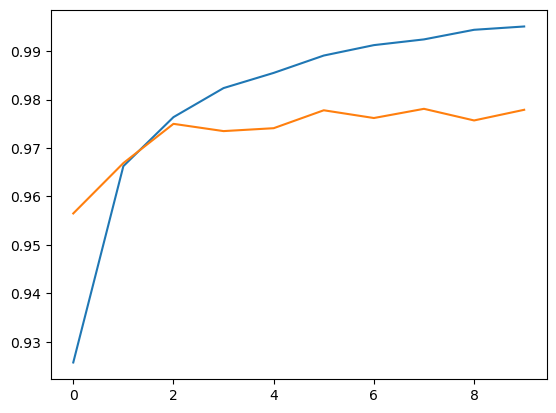

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

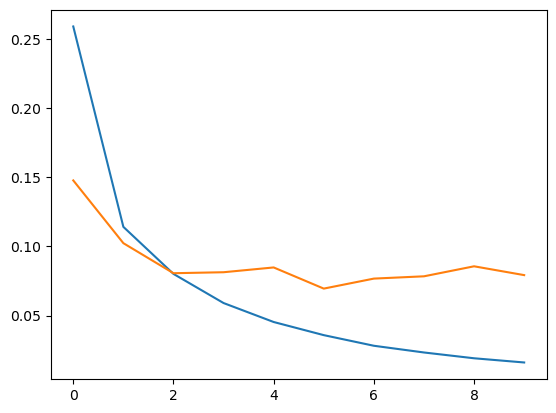

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

In [29]:
y_probability = hdc_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


In [30]:
y_pred = y_probability.argmax(axis=1)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)*100

97.78999999999999

In [32]:
import seaborn as sns

<Axes: >

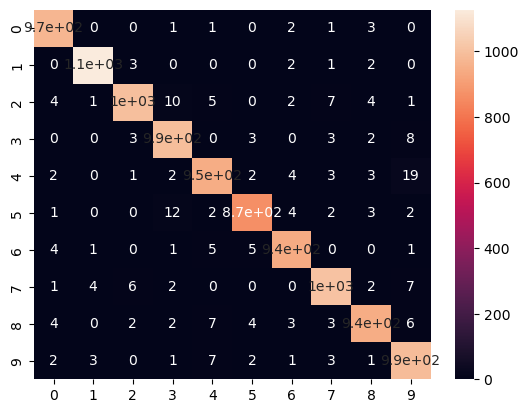

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [34]:
print("Train Accuracy",history.history['accuracy'][-1]*100)
print("Validation Accuracy",history.history['val_accuracy'][-1]*100)

Train Accuracy 99.51000213623047
Validation Accuracy 97.79000282287598


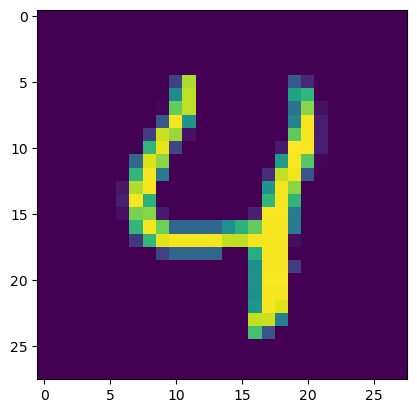

In [35]:
plt.imshow(x_test[4])

In [36]:
hdc_model.predict(x_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([4], dtype=int64)